In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Sintonia para todas as variáveis
# proc_path = '../dist6_22/proc.csv'
# alm_path = '../dist6_22/alm_seq.csv'
# threshold_path = '../dist6_22/threshold.csv'

# Sintonia Gao
# proc_path = '../dist6_gao/proc.csv'
# alm_path = '../dist6_gao/alm_seq.csv'
# threshold_path = '../dist6_gao/threshold.csv'

# Sintonia variáveis selecionadas
# proc_path = '../dist6_key_var/proc.csv'
# alm_path = '../dist6_key_var/alm_seq.csv'
# threshold_path = '../dist6_key_var/threshold.csv'

# 2/8
# proc_path = '../dist6_data/proc_corr_dist6.csv'
# alm_path = '../dist6_data/alm_seq_corr_dist6.csv'
# threshold_path = '../dist6_data/corr_threshold_MultiLoop_mode1_73_dist6.csv'

# .5 / 2.5
##proc_path = '../dist6_3horas_sig/proc.csv'
proc_path = '../proc_i3e.csv'
alm_path = '../dist6_3horas_sig/alm_seq.csv'
threshold_path = '../dist6_3horas_sig/threshold.csv'

In [20]:
proc_df = pd.read_csv(proc_path, index_col='TOUT', usecols=['TOUT']+["XMEAS%02d" % x for x in  [1,2,3,6,7,8,9,21]])
proc_df.index = pd.to_datetime(proc_df.index, unit='s')
proc_df.head()

,XMEAS01,XMEAS02,XMEAS03,XMEAS06,XMEAS07,XMEAS08,XMEAS09,XMEAS21
TOUT,,,,,,,,
2019-12-10 16:54:17.616330147,0.271033,3649.739415,4451.320791,47.559754,2798.975799,64.995825,122.898796,102.480028
2019-12-10 16:54:53.616330147,0.270093,3663.351750,4428.605105,47.917222,2799.059838,65.254940,122.883398,102.484819
2019-12-10 16:55:29.616330147,0.271255,3656.090868,4429.093949,47.750928,2799.345791,64.930642,122.909663,102.499473
2019-12-10 16:56:05.616330147,0.269950,3664.897833,4439.129238,47.305023,2799.251300,65.188788,122.909316,102.465085
2019-12-10 16:56:41.616330147,0.270947,3616.540495,4446.078748,47.813862,2798.967112,65.686033,122.887484,102.463271


In [25]:
cols = [col.replace("MEAS", '').lower() for col in proc_df.columns]
cols

rename_proc = {key:value for key, value in zip(proc_df.columns, cols)}
proc_df.rename(rename_proc, axis=1, inplace=True)

In [27]:
threshold_df = pd.read_csv(threshold_path, index_col='proc_var')
threshold_df = threshold_df.loc[[1,2,3,6,7,8,9,21]]
threshold_df


,limit,type,dead_band,delay_time
proc_var,,,,
1,0.249111,LOW,NaN,NaN
1,0.284437,HIGH,NaN,NaN
2,3597.394823,LOW,NaN,NaN
2,3711.109968,HIGH,NaN,NaN
3,4371.271459,LOW,NaN,NaN
3,4514.069121,HIGH,NaN,NaN
6,46.954535,LOW,NaN,NaN
6,48.235269,HIGH,NaN,NaN
7,2796.971605,LOW,NaN,NaN


In [5]:
#Analysis for 3sigma method
# threshold_sigma_df = pd.read_csv('../sigma_threshold_MultiLoop_mode1_73.csv', index_col='proc_var')
# threshold_sigma_df = threshold_sigma_df.loc[[1,2,3,6,8,9,21]]

In [6]:
# threshold_sigma_df

In [7]:
# alm_df = pd.read_csv(alm_path, index_col='tout', usecols=['tout']+["xmeas%02d_low" % x for x in  [1, 2, 3, 8, 9, 21]]+["xmeas%02d_high" % x for x in  [1, 2, 3, 8, 9, 21]])
# alm_df.index = proc_df.index
# alm_df.head()

In [8]:
# var_names = ['XMEAS%02d' % x for x in [1,2,3,6,7,8,9,21]]
# axes = proc_df[var_names].iloc[0:4000].plot(subplots=True, figsize=(20, 20), color='blue', scaley='linear')

# # alm_diff_df = alm_df.iloc[300:400].diff()
# for i, ax in enumerate(axes):
#     mean = np.mean(proc_df[proc_df.columns[i]])
#     sig = np.std(proc_df[proc_df.columns[i]])
#     ax.set_ylim(mean - 5*sig , mean+ 5*sig)

#     print(threshold_df.iloc[i].limit)
#     ax.axhline(y=threshold_df.iloc[i].limit, color="red" if threshold_df.iloc[i].type == "HIGH" else "green", ls='--')
# #     ax.axhline(y=threshold_df.iloc[i*(2)].limit, color="gray", ls='--')
# #     ax.axhline(y=threshold_df.iloc[i*(2) + 1].limit, color="gray", ls='--')
    
# #     diff_high = alm_diff_df[var_names[i]+'_high']
# #     begin_high = alm_diff_df[diff_high > 0].index
# #     end_high = alm_diff_df[diff_high < 0].index
    
# #     if begin_high.size > end_high.size:
# #         end_high = np.append(end_high, a.size)
# #     elif begin_high.size < end_high.size:
# #         begin_high = np.insert(begin_high, 0, alm_diff_df.iloc[0].name) 
# #     elif begin_high.size == 0 and end_high.size == 0:
# #         begin_high = []
# #         end_high = []
# #     elif np.all(begin_high > end_high):
# #         begin_high = np.insert(begin_high, 0, alm_diff_df.iloc[0].name)
# #         end_high = np.append(end_high, a.size)
    
# #     for b, e in zip(begin_high, end_high):
# #         ax.axvspan(b, e, color="red")
        
        
# #     diff_low = alm_diff_df[var_names[i]+'_low']
# #     begin_low = alm_diff_df[diff_low > 0].index
# #     end_low = alm_diff_df[diff_low < 0].index
    
# #     if begin_low.size > end_low.size:
# #         end_low = np.append(end_low, a.size)
# #     elif begin_low.size < end_low.size:
# #         begin_low = np.insert(begin_low, 0, alm_diff_df.iloc[0].name) 
# #     elif begin_low.size == 0 and end_low.size == 0:
# #         begin_low = []
# #         end_low = []
# #     elif np.all(begin_low > end_low):
# #         print(begin_low)
# #         begin_low = np.insert(begin_low, 0, alm_diff_df.iloc[0].name)
# #         end_low = np.append(end_low, a.size)
    
# #     for b, e in zip(begin_low, end_low):
# #         ax.axvspan(b, e, color="yellow")
# #     ax.axvline(x=proc_df.index[200], color="black", ls='--')
    

# #     ax.axvspan(proc_df.index[300], proc_df.index[350], color="pink", ls='--')
#     ax.axvline(x=proc_df.index[1000], color="black", ls='--')
#     ax.axvline(x=proc_df.index[1100], color="black", ls='--')
    
#     ax.axvline(x=proc_df.index[2500], color="black", ls='--')
#     ax.axvline(x=proc_df.index[2600], color="black", ls='--')
#     ax.legend(loc='upper right')
# plt.show()

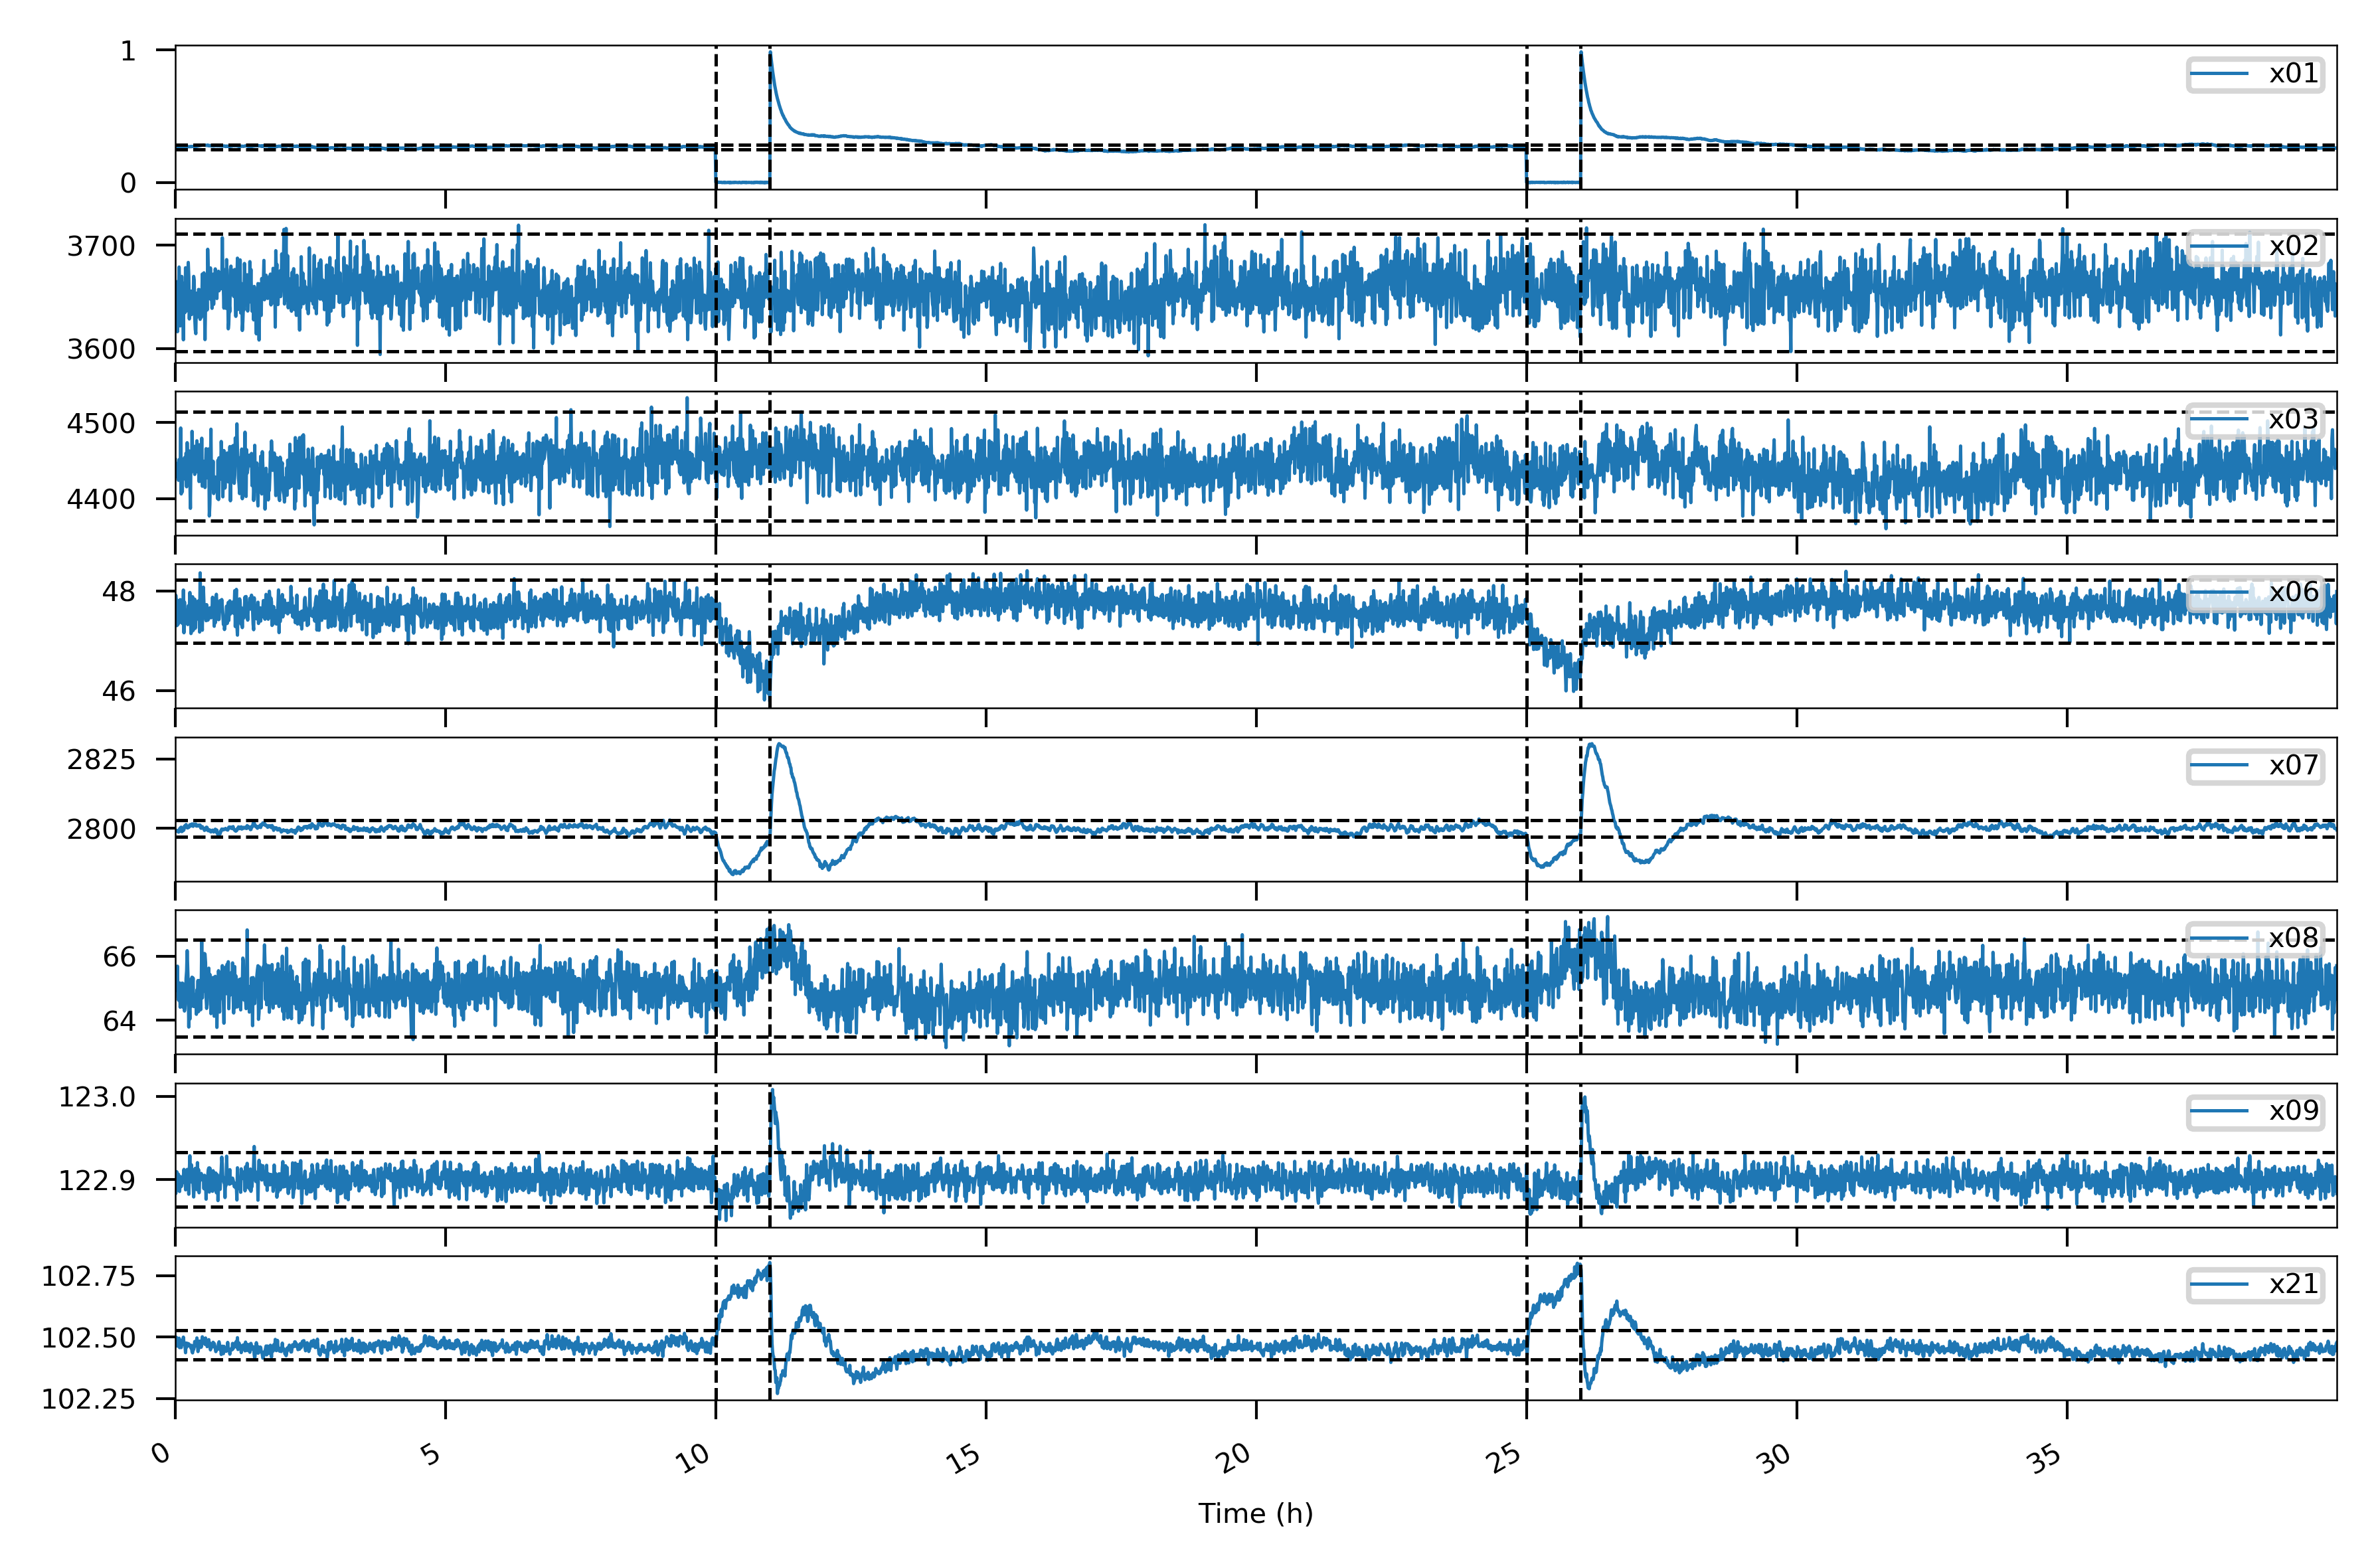

In [34]:
var_names = ['x%02d' % x for x in [1,2,3,6,7,8,9,21]]

df = proc_df[var_names].iloc[0:4000].reset_index().drop(['TOUT'], axis=1)
df.index = df.index/100

plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

plt.rcParams['lines.linewidth'] = 0.6
plt.rcParams['axes.linewidth'] = 0.3
plt.rcParams['font.size'] = 5

plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['legend.borderpad'] = 0.2
plt.rcParams['legend.frameon']= True
plt.rcParams['legend.borderpad']= 0.1


# fig, axes = plt.subplots()

axes = df.plot(subplots=True, figsize=(7,5), color='tab:blue')
plt.ticklabel_format(axis= 'y',style='plain')

for i, ax in enumerate(axes):
    ax.axhline(y=threshold_df.iloc[i*(2)].limit, color="black" , ls='--')
    ax.axhline(y=threshold_df.iloc[i*(2) + 1].limit, color="black",ls='--')
    
    ax.set_xlabel('Time (h)')
    
    ax.axvline(x=df.index[1000], color="black", ls='--')
    ax.axvline(x=df.index[1100], color="black", ls='--')
    
    ax.axvline(x=df.index[2500], color="black", ls='--')
    ax.axvline(x=df.index[2600], color="black", ls='--')
    ax.legend(loc='upper right')
    
    ax.ticklabel_format(axis= 'y',style='plain', useOffset=False)
    

    x = ax.get_xticks() 
    y = ax.get_yticks() 

    
    ax.minorticks_off()

# plt.tight_layout()
plt.gcf().savefig("process_var.pdf", bbox_inches='tight')


In [10]:
x = [str(e/100) for e in x]

In [11]:
y =

SyntaxError: invalid syntax (<ipython-input-11-c39f87e62884>, line 1)

In [ ]:
y

In [ ]:
print(plt.rcParams)

In [ ]:
# begin_high = np.insert(begin_high, 0, alm_diff_df.iloc[0].index)
alm_diff_df.iloc[0].name

In [ ]:
# alm_df.rolling(10).mean().round().iloc[0:2600].plot(subplots=True, figsize=(20, 8))
alm_df.iloc[250:600].plot(subplots=True, figsize=(20, 8))
plt.show()

In [ ]:
#Plot vars 3sigma method
proc_df = pd.read_csv(proc_path, index_col='tout', usecols=['tout']+["xmeas%02d" % x for x in  [1,2,3,8,9,21]])
proc_df.index = pd.to_datetime(proc_df.index, unit='s')
proc_df.head()

threshold_sigma_df = pd.read_csv('../sigma_threshold_MultiLoop_mode1_73.csv', index_col='proc_var')
threshold_sigma_df = threshold_sigma_df.loc[[1,2,3,8,9,21]]

axes = proc_df.iloc[0:1000].plot(subplots=True, figsize=(20, 8))
for i, ax in enumerate(axes):
    ax.axhline(y=threshold_sigma_df.iloc[i*(2)].limit, color="gray", ls='--')
    ax.axhline(y=threshold_sigma_df.iloc[i*(2) + 1].limit, color="gray", ls='--')
    
    ax.axvline(x=proc_df.index[100], color="black", ls='--')
    ax.axvline(x=proc_df.index[1300], color="black", ls='--')
    ax.axvline(x=proc_df.index[1400], color="black", ls='--')
plt.show()

In [ ]:
p = pd.read_csv("../dist6_process.csv", names=["x%1d" % x for x in  range(1,74)])
p = p[["x%1d" % x for x in  [1,2,3,8,9,21]]]
p.iloc[200:15000].plot(subplots=True, figsize=(20, 8))
plt.show()

In [ ]:
p.head(160000)